## Desafio N° 1
#### Análisis exploratorio de un dataset de precios de propiedades.


1. Importamos las librerías que vamos a utilizar.

In [2]:
import pandas as pd
import numpy as np
import re

2. Leemos el archivo 'properati.csv' con pd.read_csv.
   Lo nombramos como variable data, y luego visualizamos con pd.head, 
   para poder ver cuales son algunas de las columnas de nuestra data.

In [3]:
data_location="properati.csv"
data=pd.read_csv(data_location,",")
data.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


3. Identificamos todas las columnas, para entender de  que manera está organizado nuestro DataFrame.

In [4]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

4. Quitamos algunas de las columnas que no necesitamos.


In [5]:
data1=data.loc[:,['operation','property_type','place_name','place_with_parent_names','state_name','price','currency','price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2']]
data1.head(5)

,operation,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429


4. Contamos cuantas propiedades por lugar hay en la columna 'place_name':


In [6]:
data1.place_name.value_counts().head(20)

Córdoba            9254
Rosario            8504
Mar del Plata      6534
Tigre              3324
Nordelta           3315
Belgrano           2992
Palermo            2885
La Plata           2534
Caballito          2273
Pilar              2228
Villa Urquiza      1632
Olivos             1590
Recoleta           1547
Lomas de Zamora    1529
Flores             1354
Ituzaingó          1340
Villa Crespo       1331
Capital Federal    1297
San Telmo          1216
Morón              1209
Name: place_name, dtype: int64

5. Vemos que tipos de datos hay en cada columna para comprobar que los tipos de datos de cada columna esten correctos

In [7]:
data1.dtypes

operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
state_name                     object
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
dtype: object

Vemos cual es el porcentaje de valores nulos en cada columna

In [8]:
nulos = data1.isnull().sum()/data.shape[0]*100
nulos

operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
state_name                     0.000000
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
dtype: float64

Reemplazamos el valor de toda la columna place_name con el ultimo elemento de la columna place_with_parent_names asi esa columna pasa  a tener 0 registros nulos

In [9]:
a=data1['place_with_parent_names'].apply(lambda x: re.split("\|+",x))
print(a)

0               [, Argentina, Capital Federal, Mataderos, ]
1         [, Argentina, Bs.As. G.B.A. Zona Sur, La Plata, ]
2               [, Argentina, Capital Federal, Mataderos, ]
3                 [, Argentina, Capital Federal, Liniers, ]
4         [, Argentina, Buenos Aires Costa Atlántica, Ma...
                                ...                        
121215           [, Argentina, Capital Federal, Belgrano, ]
121216    [, Argentina, Bs.As. G.B.A. Zona Norte, San Is...
121217      [, Argentina, Capital Federal, Villa Urquiza, ]
121218    [, Argentina, Buenos Aires Costa Atlántica, Ma...
121219                     [, Argentina, Capital Federal, ]
Name: place_with_parent_names, Length: 121220, dtype: object


Realizamos un regex para extraer información de la columna 'place_with_parent_names' a fin de identificar mejor de que lugar es cada propiedad.


In [10]:
h=data1['place_with_parent_names'].apply(lambda x: re.split("\|+",x)[2] if len(re.split("\|+",x))==4 else re.split("\|+",x)[2] + " " +  re.split("\|+",x)[3])
data1['place_name']=h

i=data1['place_with_parent_names'].apply(lambda x: re.split("\|+",x)[2] if len(re.split("\|+",x))<5 else re.split("\|+",x)[4]) 
data1['place_name_2']=i

h.head(20)

0                      Capital Federal Mataderos
1                Bs.As. G.B.A. Zona Sur La Plata
2                      Capital Federal Mataderos
3                        Capital Federal Liniers
4     Buenos Aires Costa Atlántica Mar del Plata
5                        Entre Ríos Gualeguaychú
6         Bs.As. G.B.A. Zona Norte Vicente López
7                       Capital Federal Belgrano
8                       Capital Federal Belgrano
9                               Santa Fe Rosario
10                               Córdoba Córdoba
11           Bs.As. G.B.A. Zona Norte San Miguel
12           Bs.As. G.B.A. Zona Norte San Isidro
13                       Capital Federal Palermo
14                       Capital Federal Palermo
15           Bs.As. G.B.A. Zona Norte San Miguel
16                     Capital Federal Mataderos
17                Bs.As. G.B.A. Zona Norte Tigre
18                Bs.As. G.B.A. Zona Norte Tigre
19                       Capital Federal Palermo
Name: place_with_par

In [11]:
data1.place_name.value_counts().head(20)

Bs.As. G.B.A. Zona Norte Tigre                 8983
Santa Fe Rosario                               8504
Buenos Aires Costa Atlántica Mar del Plata     7710
Córdoba Córdoba                                6606
Capital Federal Palermo                        4083
Bs.As. G.B.A. Zona Norte Vicente López         3663
Bs.As. G.B.A. Zona Sur Lomas de Zamora         3470
Bs.As. G.B.A. Zona Sur La Plata                3360
Bs.As. G.B.A. Zona Norte Pilar                 3249
Bs.As. G.B.A. Zona Norte San Isidro            3009
Capital Federal Belgrano                       2992
Córdoba                                        2648
Bs.As. G.B.A. Zona Oeste Morón                 2645
Bs.As. G.B.A. Zona Oeste La Matanza            2347
Capital Federal Caballito                      2273
Bs.As. G.B.A. Zona Norte Escobar               1909
Bs.As. G.B.A. Zona Sur Lanús                   1816
Capital Federal Villa Urquiza                  1629
Bs.As. G.B.A. Zona Sur Almirante Brown         1603
Bs.As. G.B.A

In [12]:
data1['place_name'].isnull().sum()

0

In [13]:
data1['place_name'].head(15)

0                      Capital Federal Mataderos
1                Bs.As. G.B.A. Zona Sur La Plata
2                      Capital Federal Mataderos
3                        Capital Federal Liniers
4     Buenos Aires Costa Atlántica Mar del Plata
5                        Entre Ríos Gualeguaychú
6         Bs.As. G.B.A. Zona Norte Vicente López
7                       Capital Federal Belgrano
8                       Capital Federal Belgrano
9                               Santa Fe Rosario
10                               Córdoba Córdoba
11           Bs.As. G.B.A. Zona Norte San Miguel
12           Bs.As. G.B.A. Zona Norte San Isidro
13                       Capital Federal Palermo
14                       Capital Federal Palermo
Name: place_name, dtype: object

## Disminuyo el porcentaje de nulos de la columna price_usd_per_m2

Esta columna tiene ~43% de valores nulos, pero como se calcula dividiendo la columna "price_aprox_usd" con la columna "surface_covered_in_m2" y ambas columnas tienen ~16% de valores nulos, entonces puedo recalcular los valores de la columa price_usd_per_m2 haciendo esta division y asi pasaria a tener un % de valores nulos menor.

In [14]:
c=data1.loc[:,'price_aprox_usd']/data1.loc[:,'surface_covered_in_m2']

data1['price_usd_per_m2']=c


Verificamos que haya disminuido el porcentaje de la columna price_usd_per_m2.


In [15]:
nulos = data1.isnull().sum()/data1.shape[0]*100

Hay valores de la columna price_aprox_usd que son distintos de cero cuando los de la columna surface_covered_in_m2 son iguales a cero
y viceversa, lo que deberia hacer ahora es agrupar, y calcular los promedios para poder imputar valores de manera especifica __a partir de una u otra columna__,
y una vez hecho eso droppear el resto de valores nulos que no voy a poder reemplazar o bien reemplazar por el promedio de lo que tenga. 

In [16]:
data1.head(200)
data1["place_name"]

0                          Capital Federal Mataderos
1                    Bs.As. G.B.A. Zona Sur La Plata
2                          Capital Federal Mataderos
3                            Capital Federal Liniers
4         Buenos Aires Costa Atlántica Mar del Plata
                             ...                    
121215                      Capital Federal Belgrano
121216           Bs.As. G.B.A. Zona Norte San Isidro
121217                 Capital Federal Villa Urquiza
121218    Buenos Aires Costa Atlántica Mar del Plata
121219                               Capital Federal
Name: place_name, Length: 121220, dtype: object

In [17]:
data1.place_name_2.value_counts(ascending=True).head(30)

Laguna de los Padres                   1
Villars                                1
Jujuy                                  1
Villa Centenario                       1
Mi Refugio                             1
Barrio Cerrado "La Damasia"            1
Barrio Melazzi                         1
Bernardino Rivadavia                   1
La Herradura                           1
Marina Del Sol (Sun's Marine)          1
Jeppener                               1
Juramento                              1
General Belgrano                       1
Materno                                1
Barrio Cerrado Los Troncos             1
Barrio San Marco                       1
Barrio Parque Girado                   1
Olivera                                1
Berazategui Oeste                      1
La Pilarica                            1
Carmen de Patagones                    1
La Escondida de Manzanares             1
Country Golf El Sosiego                1
Islas                                  1
Navarro         

In [18]:
menos_10_prop = data1.place_name_2.value_counts() < 5
menos_10_prop.value_counts()

False    355
True     237
Name: place_name_2, dtype: int64

Agrupamops en una Pivot_table segun las columnas 'state_name' 'place_name'. 
Identificamos los registros que tienen valores nulos, a partir de la media.

In [19]:
result = data1.pivot_table(["price_usd_per_m2"],index=["state_name", "place_name"], aggfunc={'price_usd_per_m2':[np.mean,np.std,len,np.min]})
print(type(result))
result_isnull = result[('price_usd_per_m2','mean')].isnull()
result[result_isnull]
print(type(result_isnull))
result[result_isnull]

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


price_usd_per_m2  \
                                                                         amin   
state_name            place_name                                                
Buenos Aires Interior Buenos Aires Interior Adolfo Alsina                 NaN   
                      Buenos Aires Interior Carmen de Areco               NaN   
                      Buenos Aires Interior General Belgrano              NaN   
                      Buenos Aires Interior General Lavalle               NaN   
                      Buenos Aires Interior General Paz                   NaN   
...                                                                       ...   
Tucumán               Tucumán Concepción                                  NaN   
                      Tucumán Las Talitas                                 NaN   
                      Tucumán Lules                                       NaN   
                      Tucumán Tafí Viejo                                  NaN   
                      Tucumán Villa Belgrano                              NaN   

                                                                             
                                                               len mean std  
state_name            place_name                                             
Buenos Aires Interior Buenos Aires Interior Adolfo Alsina      8.0  NaN NaN  
                      Buenos Aires Interior Carmen de Areco   11.0  NaN NaN  
                      Buenos Aires Interior General Belgrano   2.0  NaN NaN  
                      Buenos Aires Interior General Lavalle    1.0  NaN NaN  
                      Buenos Aires Interior General Paz        1.0  NaN NaN  
...                                                            ...  ...  ..  
Tucumán               Tucumán Concepción                       1.0  NaN NaN  
                      Tucumán Las Talitas                      1.0  NaN NaN  
                      Tucumán Lules                            2.0  NaN NaN  
                      Tucumán Tafí Viejo                      16.0  NaN NaN  
                      Tucumán Villa Belgrano                   1.0  NaN NaN  

[128 rows x 4 columns]

In [20]:
result_ordenado = pd.DataFrame(result.to_records())

In [21]:
place_vacios = result_ordenado["place_name"] == ""
result_ordenado["('price_usd_per_m2', 'len')"][place_vacios].sum()

0.0

VER QUE FALLA ACA ARRIBA CON EL PARENTESIS

In [22]:
result_isnotnull = result[('price_usd_per_m2','mean')].notnull()
result[result_isnotnull]

price_usd_per_m2  \
                                                                                  amin   
state_name               place_name                                                      
Bs.As. G.B.A. Zona Norte Bs.As. G.B.A. Zona Norte                           357.533437   
                         Bs.As. G.B.A. Zona Norte Escobar                    10.566946   
                         Bs.As. G.B.A. Zona Norte General San Martín        266.666667   
                         Bs.As. G.B.A. Zona Norte José C Paz                266.393443   
                         Bs.As. G.B.A. Zona Norte Malvinas Argentinas        93.749214   
...                                                                                ...   
Tierra Del Fuego         Tierra Del Fuego Ushuaia                          1524.012935   
Tucumán                  Tucumán                                            400.597667   
                         Tucumán San Miguel de Tucumán                      685.467111   
                         Tucumán Tafí del Valle                             436.206333   
                         Tucumán Yerba Buena                                846.153846   

                                                                               \
                                                                          len   
state_name               place_name                                             
Bs.As. G.B.A. Zona Norte Bs.As. G.B.A. Zona Norte                       222.0   
                         Bs.As. G.B.A. Zona Norte Escobar              1909.0   
                         Bs.As. G.B.A. Zona Norte General San Martín   1582.0   
                         Bs.As. G.B.A. Zona Norte José C Paz            140.0   
                         Bs.As. G.B.A. Zona Norte Malvinas Argentinas   489.0   
...                                                                       ...   
Tierra Del Fuego         Tierra Del Fuego Ushuaia                         8.0   
Tucumán                  Tucumán                                         77.0   
                         Tucumán San Miguel de Tucumán                  362.0   
                         Tucumán Tafí del Valle                          22.0   
                         Tucumán Yerba Buena                            191.0   

                                                                                    \
                                                                              mean   
state_name               place_name                                                  
Bs.As. G.B.A. Zona Norte Bs.As. G.B.A. Zona Norte                      1542.439300   
                         Bs.As. G.B.A. Zona Norte Escobar              2381.931441   
                         Bs.As. G.B.A. Zona Norte General San Martín   2451.126893   
                         Bs.As. G.B.A. Zona Norte José C Paz           1405.997286   
                         Bs.As. G.B.A. Zona Norte Malvinas Argentinas  2420.914997   
...                                                                            ...   
Tierra Del Fuego         Tierra Del Fuego Ushuaia                      2868.115101   
Tucumán                  Tucumán                                        990.347769   
                         Tucumán San Miguel de Tucumán                 2893.278779   
                         Tucumán Tafí del Valle                         469.982977   
                         Tucumán Yerba Buena                           1723.605609   

                                                                                     
                                                                                std  
state_name               place_name                                                  
Bs.As. G.B.A. Zona Norte Bs.As. G.B.A. Zona Norte                       1234.165766  
                         Bs.As. G.B.A. Zona Norte Escobar              12371.818982  
                         Bs.As. G.B.A. 

Sacamos el promedio de todas las columnas.

In [23]:
result_ordenado.isnull().sum()/result_ordenado.shape[0]*100

state_name                       0.000000
place_name                       0.000000
('price_usd_per_m2', 'amin')    21.917808
('price_usd_per_m2', 'len')      0.000000
('price_usd_per_m2', 'mean')    21.917808
('price_usd_per_m2', 'std')     42.808219
dtype: float64

Renombramos todas las columnas.

In [24]:
columnas_dic = {'operation': 'Tipo_de_operacion', 'property_type': 'tipo_de_propiedad', 'place_name' : 'ciudad', 'place_with_parent_names': 'ubicacion',
       'country_name': 'pais', 'state_name': 'provincia', 'price' : 'precio', 'price_aprox_local_currency': 'Precio_aproximado_en_pesos',
       'price_aprox_usd': 'precio_aproximado_en_USD', 'surface_total_in_m2': 'superficie_total_en_M2', 'surface_covered_in_m2': 'superficie_cubierta_en_M2',
       'price_usd_per_m2': 'Precio_en_Dolares_por_M2', 'price_per_m2': 'precio_por_M2'}
data1 = data1.rename(columns=columnas_dic)
data1.head()

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_total_en_M2,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2
0,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.0,62000.0,55.0,40.0,1550.000000,1550.000000,
1,sell,apartment,Bs.As. G.B.A. Zona Sur La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,
2,sell,apartment,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,
3,sell,PH,Capital Federal Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,
4,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,Centro


In [25]:
data_2 = data1.groupby(['provincia', 'ciudad', 'place_name_2'])
data_2.head(5)

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_total_en_M2,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2
0,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.00,62000.00,55.0,40.0,1550.000000,1550.000000,
1,sell,apartment,Bs.As. G.B.A. Zona Sur La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,
2,sell,apartment,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,
3,sell,PH,Capital Federal Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,
4,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,USD,1129248.00,64000.00,35.0,35.0,1828.571429,1828.571429,Centro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119832,sell,house,Santa Fe Malabrigo,|Argentina|Santa Fe|Malabrigo|,Santa Fe,2500000.0,ARS,2473921.05,140209.19,300.0,130.0,1078.532231,19230.769231,
120061,sell,house,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,72000.0,USD,1270404.00,72000.00,500.0,86.0,837.209302,837.209302,Los Acantilados
120082,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,72000.0,USD,1270404.00,72000.00,50.0,45.0,1600.000000,1600.000000,Barrio La Perla Norte
120644,sell,house,Córdoba Agua de Oro,|Argentina|Córdoba|Agua de Oro|,Córdoba,NaN,NaN,NaN,NaN,NaN,140.0,NaN,NaN,


Sacamos todos los nulos de la columna 'Precio_en_Dolares_por_M2' para poder realizar un promedio real del precio por metro cuadrado en USD de acuerdo a la localidad.

In [26]:
precio_M2_dolar_sin_nulos = data1.dropna(axis=0, subset=['Precio_en_Dolares_por_M2'])
data_3 =precio_M2_dolar_sin_nulos.groupby(['provincia', 'ciudad'])
data_sin_place_name = data_3.mean()
data_sin_place_name

precio  \
provincia                ciudad                                                       
Bs.As. G.B.A. Zona Norte Bs.As. G.B.A. Zona Norte                      2.724984e+05   
                         Bs.As. G.B.A. Zona Norte Escobar              3.523756e+05   
                         Bs.As. G.B.A. Zona Norte General San Martín   1.781078e+05   
                         Bs.As. G.B.A. Zona Norte José C Paz           1.625359e+05   
                         Bs.As. G.B.A. Zona Norte Malvinas Argentinas  4.134492e+05   
...                                                                             ...   
Tierra Del Fuego         Tierra Del Fuego Ushuaia                      1.534000e+06   
Tucumán                  Tucumán                                       2.368571e+06   
                         Tucumán San Miguel de Tucumán                 1.754314e+06   
                         Tucumán Tafí del Valle                        1.333333e+06   
                         Tucumán Yerba Buena                           5.735000e+06   

                                                                       Precio_aproximado_en_pesos  \
provincia                ciudad                                                                     
Bs.As. G.B.A. Zona Norte Bs.As. G.B.A. Zona Norte                                    4.367626e+06   
                         Bs.As. G.B.A. Zona Norte Escobar                            4.717818e+06   
                         Bs.As. G.B.A. Zona Norte General San Martín                 3.129236e+06   
                         Bs.As. G.B.A. Zona Norte José C Paz                         2.451491e+06   
                         Bs.As. G.B.A. Zona Norte Malvinas Argentinas                5.916854e+06   
...                                                                                           ...   
Tierra Del Fuego         Tierra Del Fuego Ushuaia                                    4.915604e+06   
Tucumán                  Tucumán                                                     3.652465e+06   
                         Tucumán San Miguel de Tucumán                               3.902522e+06   
                         Tucumán Tafí del Valle                                      1.319424e+06   
                         Tucumán Yerba Buena                                         6.043306e+06   

                                                                       precio_aproximado_en_USD  \
provincia                ciudad                                                                   
Bs.As. G.B.A. Zona Norte Bs.As. G.B.A. Zona Norte                                 247534.704096   
                         Bs.As. G.B.A. Zona Norte Escobar                         267381.779168   
                         Bs.As. G.B.A. Zona Norte General San Martín              177349.101432   
                         Bs.As. G.B.A. Zona Norte José C Paz                      138937.989231   
                         Bs.As. G.B.A. Zona Norte Malvinas Argentinas             335337.035975   
...                                                                                         ...   
Tierra Del Fuego         Tierra Del Fuego Ushuaia                                 278591.288000   
Tucumán                  Tucumán                                                  207003.042857   
                         Tucumán San Miguel de Tucumán                            221175.001053   
                         Tucumán Tafí del Valle                                    74778.230000   
                         Tucumán Yerba Buena                                      342503.681667   

                                                                       superficie_total_en_M2  \
provincia                ciudad                                                                 
Bs.As. G.B.A. Zona Norte Bs.As. G.B.A. Zona Norte                                  645.088050   
                         Bs.As. G.B.A. Zona Norte Es

Guardamos las columnas 'ciudad' y 'Precio_en_Dolares_por_M2' en dos listas que luego transformamos en un diccionario.

In [27]:
dic_ciudad = precio_M2_dolar_sin_nulos['ciudad'].tolist()
ciudad_unq_lista = np.unique(dic_ciudad)

precios_unq_lista=data_sin_place_name['Precio_en_Dolares_por_M2']



In [28]:
dictionary = dict(zip(ciudad_unq_lista, precios_unq_lista))
dictionary

{'Bs.As. G.B.A. Zona Norte': 1542.4393004995868,
 'Bs.As. G.B.A. Zona Norte Escobar': 2381.931440510033,
 'Bs.As. G.B.A. Zona Norte General San Martín': 2451.126892876558,
 'Bs.As. G.B.A. Zona Norte José C Paz': 1405.997286296219,
 'Bs.As. G.B.A. Zona Norte Malvinas Argentinas': 2420.914997426306,
 'Bs.As. G.B.A. Zona Norte Pilar': 3023.1259335659042,
 'Bs.As. G.B.A. Zona Norte San Fernando': 2431.3259361019655,
 'Bs.As. G.B.A. Zona Norte San Isidro': 2883.474412348106,
 'Bs.As. G.B.A. Zona Norte San Miguel': 1763.123512290102,
 'Bs.As. G.B.A. Zona Norte Tigre': 3255.2131760354177,
 'Bs.As. G.B.A. Zona Norte Vicente López': 2998.9045828794688,
 'Bs.As. G.B.A. Zona Oeste': 1475.9294353751095,
 'Bs.As. G.B.A. Zona Oeste General Rodríguez': 1930.6898874614437,
 'Bs.As. G.B.A. Zona Oeste Hurlingham': 19934.356827987333,
 'Bs.As. G.B.A. Zona Oeste Ituzaingó': 1911.5120122890185,
 'Bs.As. G.B.A. Zona Oeste La Matanza': 2799.836092770529,
 'Bs.As. G.B.A. Zona Oeste Marcos Paz': 7209.545475980

Verificamos la cantidad de nulos en la columna 'Precio_en_Dolares_por_M2'

In [29]:
data1.Precio_en_Dolares_por_M2.isnull().sum()

33560

In [30]:
data1.isnull().sum()

Tipo_de_operacion                 0
tipo_de_propiedad                 0
ciudad                            0
ubicacion                         0
provincia                         0
precio                        20410
currency                      20411
Precio_aproximado_en_pesos    20410
precio_aproximado_en_USD      20410
superficie_total_en_M2        39328
superficie_cubierta_en_M2     19907
Precio_en_Dolares_por_M2      33560
precio_por_M2                 33562
place_name_2                      0
dtype: int64

Utilizamos el método .fillna para reemplazar los valores nulos utilizando el diccionario creado anteriormente. Volvemos a verificar la cantidad de nulos.

In [31]:
data1.Precio_en_Dolares_por_M2 = data1.Precio_en_Dolares_por_M2.fillna(data1.ciudad.map(dictionary))
data1.Precio_en_Dolares_por_M2.isnull().sum()

417

In [32]:
data1.isnull().sum()

Tipo_de_operacion                 0
tipo_de_propiedad                 0
ciudad                            0
ubicacion                         0
provincia                         0
precio                        20410
currency                      20411
Precio_aproximado_en_pesos    20410
precio_aproximado_en_USD      20410
superficie_total_en_M2        39328
superficie_cubierta_en_M2     19907
Precio_en_Dolares_por_M2        417
precio_por_M2                 33562
place_name_2                      0
dtype: int64

In [33]:
data1.shape

(121220, 14)

Eliminamos 400 nulos restantes.

In [34]:
tabla_final = data1.dropna(axis=0, subset=['Precio_en_Dolares_por_M2'])
tabla_final

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_total_en_M2,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2
0,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.00,62000.0,55.0,40.0,1550.000000,1550.000000,
1,sell,apartment,Bs.As. G.B.A. Zona Sur La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,150000.0,USD,2646675.00,150000.0,NaN,NaN,1690.289964,NaN,
2,sell,apartment,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,
3,sell,PH,Capital Federal Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,95000.0,USD,1676227.50,95000.0,NaN,NaN,2119.561973,NaN,
4,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,USD,1129248.00,64000.0,35.0,35.0,1828.571429,1828.571429,Centro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,sell,apartment,Capital Federal Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,870000.0,USD,15350715.00,870000.0,113.0,93.0,9354.838710,9354.838710,
121216,sell,house,Bs.As. G.B.A. Zona Norte San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,498000.0,USD,8786961.00,498000.0,360.0,360.0,1383.333333,1383.333333,Beccar
121217,sell,apartment,Capital Federal Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Capital Federal,131500.0,USD,2320251.75,131500.0,46.0,39.0,3371.794872,3371.794872,
121218,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,95900.0,USD,1692107.55,95900.0,48.0,48.0,1997.916667,1997.916667,Plaza Colón


In [35]:
tabla_final.shape

(120803, 14)

In [36]:
tabla_final.isnull().sum()

Tipo_de_operacion                 0
tipo_de_propiedad                 0
ciudad                            0
ubicacion                         0
provincia                         0
precio                        20074
currency                      20075
Precio_aproximado_en_pesos    20074
precio_aproximado_en_USD      20074
superficie_total_en_M2        39138
superficie_cubierta_en_M2     19644
Precio_en_Dolares_por_M2          0
precio_por_M2                 33145
place_name_2                      0
dtype: int64

In [37]:
tabla_final.head(5)

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_total_en_M2,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2
0,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.0,62000.0,55.0,40.0,1550.000000,1550.000000,
1,sell,apartment,Bs.As. G.B.A. Zona Sur La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,150000.0,USD,2646675.0,150000.0,NaN,NaN,1690.289964,NaN,
2,sell,apartment,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,
3,sell,PH,Capital Federal Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,95000.0,USD,1676227.5,95000.0,NaN,NaN,2119.561973,NaN,
4,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,Centro


Visualizaciones utilizadas para realizar la presentación.

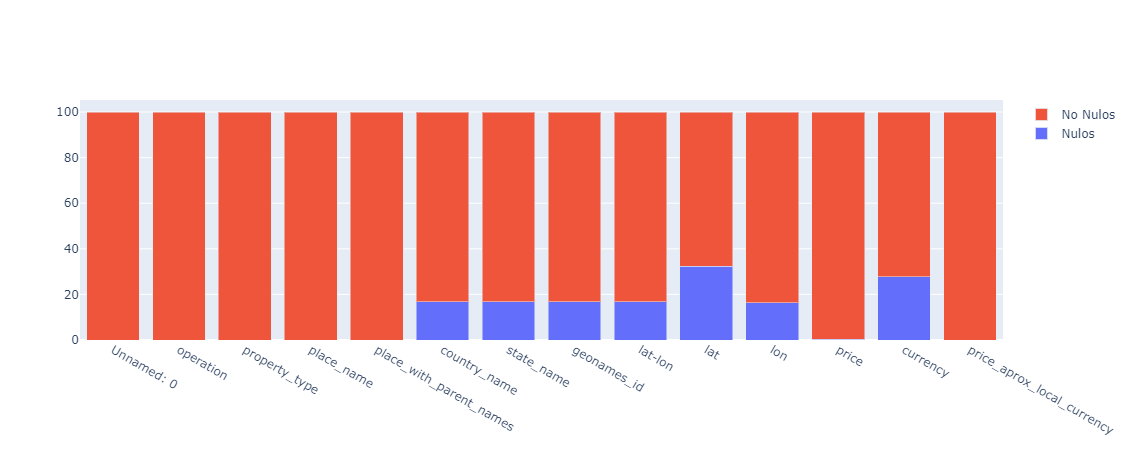

In [48]:
data_null = data1.isnull().sum()/data1.shape[0]*100
data_null
data_notnull = data1.notnull().sum()/data1.shape[0]*100
data_notnull
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import plotly.graph_objects as go
Columnas= data.columns

fig = go.Figure(data=[
    go.Bar(name='Nulos', x=Columnas, y=data_null),
    go.Bar(name='No Nulos', x=Columnas, y=data_notnull)
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

<AxesSubplot:xlabel='Precio_en_Dolares_por_M2', ylabel='provincia'>

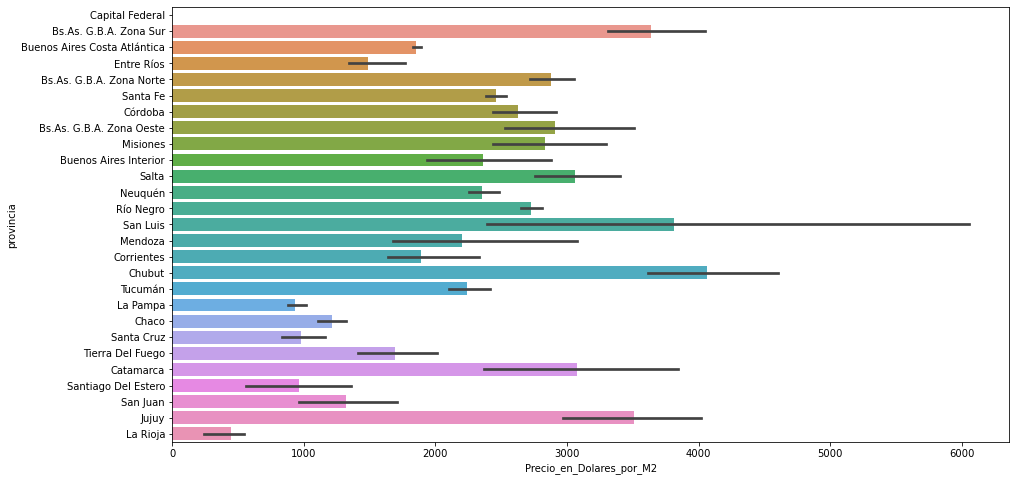

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)


sns.barplot(x=tabla_final['Precio_en_Dolares_por_M2'], y=tabla_final['provincia'],ax=ax)
